In [1]:
from keras.datasets import mnist


2024-09-26 09:23:20.340623: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 09:23:20.350725: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 09:23:20.461407: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 09:23:20.559798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 09:23:20.641768: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


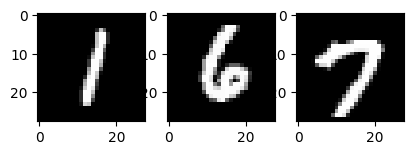

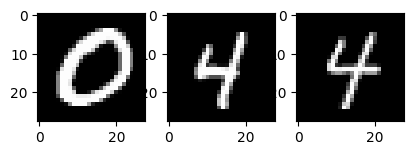

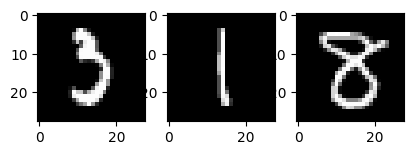

In [4]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1, 4, 1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0,60000)], cmap="gray")
    plt.show()

In [5]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))

print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')

print(f'x_train_vec.shape: {x_train_vec.shape}')
print(f'x_test_vec.shape: {x_test_vec.shape}')

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
x_train_vec.shape: (60000, 28, 28, 1)
x_test_vec.shape: (10000, 28, 28, 1)


In [6]:
# One-hot Encoding
# 0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f"y_train_vec.shape:{y_train_vec.shape}")

y_train_vec.shape:(60000, 10)


In [7]:
print(y_train[50000])
print(y_train_vec[50000])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
for x in x_train[50000]:
    for i in x:
        print('{:3} '.format(i), end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0  47 160 195 205  71  86  13   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  12 238 254 254 254 254 254 227  84   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  13 196 176 127 176 207 236 245 222  23   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 137 254  95   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 254 144   0   0   0   0   0 

In [9]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices, :, :, :]
y_valid_vec = y_train_vec[valid_indices, :]

x_train_vec = x_train_vec[train_indices, :, :, :]
y_train_vec = y_train_vec[train_indices, :] 

In [10]:
x_train_vec.shape

(50000, 28, 28, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=20, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

/home/joo/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [14]:
history = model.fit(x_train_vec, y_train_vec,
          batch_size=128,
          epochs=10,
          validation_data=(x_valid_vec, 
                           y_valid_vec)
         )
          

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.9744 - val_loss: 0.1009
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9911 - loss: 0.0309 - val_accuracy: 0.9763 - val_loss: 0.0924
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0.9766 - val_loss: 0.0916
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9762 - val_loss: 0.0974
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9927 - loss: 0.0237 - val_accuracy: 0.9771 - val_loss: 0.0941
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9939 - loss: 0.0219 - val_accuracy: 0.9769 - val_loss: 0.0947
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9949 - loss: 0.0174 - val_accuracy: 0.9790 - val_loss: 0.0892
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9954 - loss: 0.0168 - val_accuracy: 0.

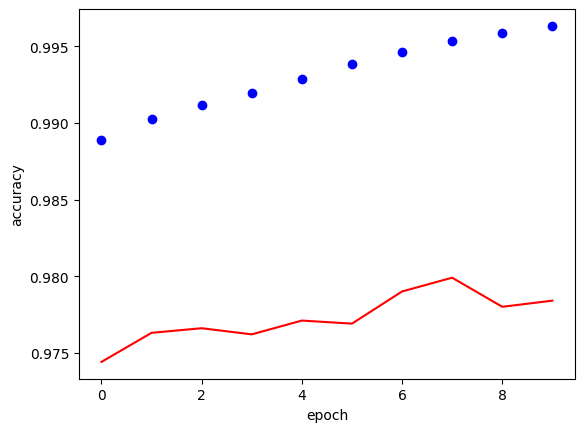

In [15]:
import matplotlib.pyplot as plt
import numpy as np

epoch = np.arange(len(history.history['accuracy']))
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epoch, train_acc, 'bo', label='train acc')
plt.plot(epoch, valid_acc, 'red', label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [16]:
r = model.evaluate(x_test_vec, y_test_vec)

print('Loss =', str(r[0]))
print('Accuracy =', str(r[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.1136
Loss = 0.08786914497613907
Accuracy = 0.9805999994277954


In [17]:
model.save('mnist984.h5')

In [18]:
model.save('mnist984.keras')